<a href="https://colab.research.google.com/github/SushmithaReddyChintalapani/Info-5737/blob/main/In_class_11554373_exercise_03_10062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (10/06/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
 
I'm currently attempting to figure out how people feel about a good or service.
I'd like to remain focused on the word 'oxygen concentrator' here.
 During COVID-19, a substantial number of individuals began using it to observe their health.
 Already I wanted to see which features are beneficial and what folks assume of the good or service.
To begin, I'd like to concentrate on a specific company's item and conduct content analysis on user ratings.
 The graphical analysis will supply me with an awareness of the visitors' responses, and the knowledge cloud's intensity vector will provide me with
 information on the attributes that the consumers are evaluating.
 I'd like to use the Pattern matching technic for sentiment analysis on textual content.

 Below link hasbeen considerd for the data to be visualized further.
 
 https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3




'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
# You code here (Please add comments in the code): 
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip()) 
df_revw = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f' data frame shape: {df_revw.shape}')
df_revw

 data frame shape: (1490, 2)


,Title,Review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was..."
1,Great device to have around,I used this device while I was suffering with ...
2,Worked Great,"Rated this product 5 for accuracy, didn't have..."
3,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...
...,...,...
1485,Would buy again,I am not using this for sports rather for medi...
1486,Easy to use,My husband and I contracted COVID and needed t...
1487,82 y.o. LOVES IT,My 82 year old great grandma absolutely loves ...
1488,Covid Safety tool,I bought this device to basically check oxygen...


In [ ]:
df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
df_revw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,Great device to have around,I used this device while I was suffering with ...,I used this device while I was suffering with ...
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,This is a good pulse oximeter at a good price ...
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",Rated this product 5 for accuracy didnt have a...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,Hard to comment knowledgably on the accuracy u...
...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,I am not using this for sports rather for medi...
96,Easy to use,My husband and I contracted COVID and needed t...,My husband and I contracted COVID and needed t...
97,Great product for the price!,I bought this pulse oximeter for my own person...,I bought this pulse oximeter for my own person...
98,Covid Safety tool,I bought this device to basically check oxygen...,I bought this device to basically check oxygen...


In [ ]:
# Remove numbers
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,Great device to have around,I used this device while I was suffering with ...,I used this device while I was suffering with ...
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,This is a good pulse oximeter at a good price ...
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",Rated this product for accuracy didnt have an...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,Hard to comment knowledgably on the accuracy u...
...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,I am not using this for sports rather for medi...
96,Easy to use,My husband and I contracted COVID and needed t...,My husband and I contracted COVID and needed t...
97,Great product for the price!,I bought this pulse oximeter for my own person...,I bought this pulse oximeter for my own person...
98,Covid Safety tool,I bought this device to basically check oxygen...,I bought this device to basically check oxygen...


In [ ]:
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_revw

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,Great device to have around,I used this device while I was suffering with ...,i used this device while i was suffering with ...
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,this is a good pulse oximeter at a good price ...
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated this product for accuracy didnt have any...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard to comment knowledgably on the accuracy u...
...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,i am not using this for sports rather for medi...
96,Easy to use,My husband and I contracted COVID and needed t...,my husband and i contracted covid and needed t...
97,Great product for the price!,I bought this pulse oximeter for my own person...,i bought this pulse oximeter for my own person...
98,Covid Safety tool,I bought this device to basically check oxygen...,i bought this device to basically check oxygen...


In [ ]:
import nltk
nltk.download()
from nltk.corpus import stopwords
sw = stopwords.words('english')
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_revw

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80......

,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...,"[(used, VBN), (device, NN), (suffering, VBG), ..."
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...,"[(good, JJ), (pulse, NN), (oximeter, RB), (goo..."
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...,"[(rated, VBN), (product, NN), (accuracy, NN), ..."
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...,"[(hard, JJ), (comment, NN), (knowledgably, RB)..."
...,...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,using sport rather medical reason easy use rea...,"[(using, VBG), (sport, NN), (rather, RB), (med..."
96,Easy to use,My husband and I contracted COVID and needed t...,husband contracted covid needed keep track oxy...,"[(husband, NN), (contracted, VBD), (covid, NN)..."
97,Great product for the price!,I bought this pulse oximeter for my own person...,bought pulse oximeter personal use due severe ...,"[(bought, VBD), (pulse, NN), (oximeter, NN), (..."
98,Covid Safety tool,I bought this device to basically check oxygen...,bought device basically check oxygen level cov...,"[(bought, VBN), (device, NN), (basically, RB),..."


In [ ]:
import nltk
nltk.download('omw-1.4')
from textblob import Word
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_revw

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...
...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,using sport rather medical reason easy use rea...
96,Easy to use,My husband and I contracted COVID and needed t...,husband contracted covid needed keep track oxy...
97,Great product for the price!,I bought this pulse oximeter for my own person...,bought pulse oximeter personal use due severe ...
98,Covid Safety tool,I bought this device to basically check oxygen...,bought device basically check oxygen level cov...


In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_revw['tagged_pos'] = df_revw['preprocessed_review'].str.split().map(pos_tag)
df_revw

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...,"[(used, VBN), (device, NN), (suffering, VBG), ..."
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...,"[(good, JJ), (pulse, NN), (oximeter, RB), (goo..."
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...,"[(rated, VBN), (product, NN), (accuracy, NN), ..."
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...,"[(hard, JJ), (comment, NN), (knowledgably, RB)..."
...,...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,using sport rather medical reason easy use rea...,"[(using, VBG), (sport, NN), (rather, RB), (med..."
96,Easy to use,My husband and I contracted COVID and needed t...,husband contracted covid needed keep track oxy...,"[(husband, NN), (contracted, VBD), (covid, NN)..."
97,Great product for the price!,I bought this pulse oximeter for my own person...,bought pulse oximeter personal use due severe ...,"[(bought, VBD), (pulse, NN), (oximeter, NN), (..."
98,Covid Safety tool,I bought this device to basically check oxygen...,bought device basically check oxygen level cov...,"[(bought, VBN), (device, NN), (basically, RB),..."


In [ ]:
#Adding count of POS of each row
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(df_revw['tagged_pos'])
df_revw['num of adj'] = adjective
df_revw['num of adverb'] = adverb
df_revw['num of conjunction'] = c_con
df_revw['num of conjuction'] = s_con
df_revw['num of interjection'] = intj
df_revw['num of noun'] = no
df_revw['num of verb'] = ve
df_revw['num of pronoun'] = pro
df_revw['nump of predeterminer'] = pre
df_revw['num of determiner'] = det

df_revw


,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,Great device to have around,I used this device while I was suffering with ...,used device suffering covid terrible bout shor...,"[(used, VBN), (device, NN), (suffering, VBG), ...",10,5,0,0,0,20,0,0,0,0
2,Accurate tool where accuracy is important,This is a good pulse oximeter at a good price....,good pulse oximeter good price seem lot cheap ...,"[(good, JJ), (pulse, NN), (oximeter, RB), (goo...",19,3,0,1,0,32,0,0,0,0
3,Worked Great,"Rated this product 5 for accuracy, didn't have...",rated product accuracy didnt anything compare ...,"[(rated, VBN), (product, NN), (accuracy, NN), ...",13,3,0,1,0,22,0,0,0,0
4,Works as needed and advertised,Hard to comment knowledgably on the accuracy u...,hard comment knowledgably accuracy get compare...,"[(hard, JJ), (comment, NN), (knowledgably, RB)...",8,1,0,0,0,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Would buy again,I am not using this for sports rather for medi...,using sport rather medical reason easy use rea...,"[(using, VBG), (sport, NN), (rather, RB), (med...",5,3,0,0,0,10,0,0,0,0
96,Easy to use,My husband and I contracted COVID and needed t...,husband contracted covid needed keep track oxy...,"[(husband, NN), (contracted, VBD), (covid, NN)...",4,1,0,0,0,14,0,0,0,0
97,Great product for the price!,I bought this pulse oximeter for my own person...,bought pulse oximeter personal use due severe ...,"[(bought, VBD), (pulse, NN), (oximeter, NN), (...",12,1,0,0,0,15,0,0,0,0
98,Covid Safety tool,I bought this device to basically check oxygen...,bought device basically check oxygen level cov...,"[(bought, VBN), (device, NN), (basically, RB),...",6,4,0,0,0,13,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
# You code here (Please add comments in the code):
#Using Correlation filter for feature selection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = df_revw.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat





Shape: (100, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,52,28,0,2,0,90,0,0,0,0
1,10,5,0,0,0,20,0,0,0,0
2,19,3,0,1,0,32,0,0,0,0
3,13,3,0,1,0,22,0,0,0,0
4,8,1,0,0,0,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,5,3,0,0,0,10,0,0,0,0
96,4,1,0,0,0,14,0,0,0,0
97,12,1,0,0,0,15,0,0,0,0
98,6,4,0,0,0,13,0,0,0,0


In [ ]:
a = num_feat
b = df_revw['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')

SHAPE of X: (100, 10)
SHAPE of Y: (100,)


In [ ]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape

((80, 10), (20, 10))

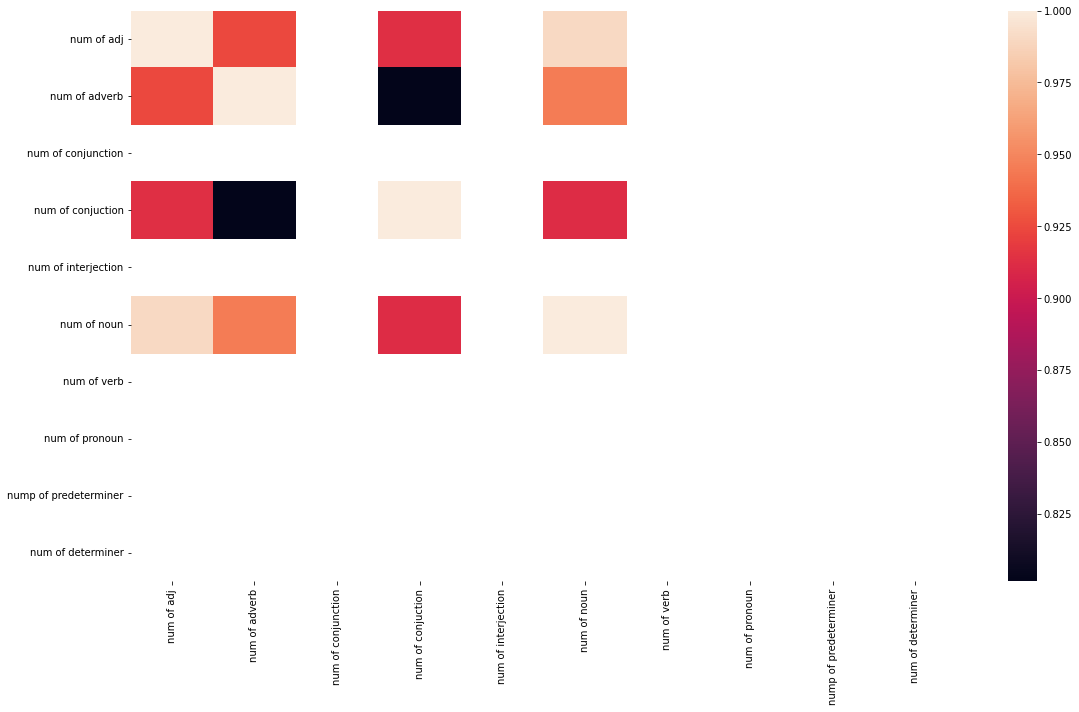

In [ ]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)

In [ ]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of conjuction', 'num of adverb', 'num of noun'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [ ]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
2,num of noun,0.404256
0,num of conjuction,0.324576
1,num of adverb,0.271168
